## Bài tiểu luận cuối học kỳ
- **Môn:** toán và thống kê cho KHDL
- **Họ và tên:** Hồ Minh Trí
- **Mã sinh viên:** 20E1020081

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns

In [2]:
df = pd.read_csv('Diem.csv')

In [3]:
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
587,588,8.25,0.82,771,481,Nam,Kinh,1,0,1.50,0,0.00
430,431,5.59,0.90,148,26,Nữ,Kinh,2,49,2.76,0,2.73
7,8,6.71,1.00,383,66,Nam,Kinh,1,91,2.80,0,2.35
230,231,5.80,0.93,10,5,Nam,Khác,2,13,1.20,1,1.30
456,457,7.13,0.70,10,10,Nam,Kinh,2,17,2.46,0,1.76
523,524,8.53,0.74,465,8,Nam,Khác,1,0,4.00,0,0.00
542,543,6.85,0.88,238,46,Nam,Kinh,2,13,2.53,1,2.76
621,622,8.39,0.62,415,14,Nam,Kinh,1,0,3.38,1,0.00
48,49,5.66,1.08,227,56,Nữ,Kinh,2,42,2.85,0,2.64
528,529,6.85,0.78,240,120,Nam,Kinh,2,40,1.75,0,2.07


In [4]:
df.describe()

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,6.283543,0.854802,313.181943,108.046512,1.500684,47.061560,2.331382,0.325581,2.080629
std,211.165812,1.175870,0.153612,198.603442,109.667420,0.500342,35.134151,0.758158,0.468913,0.990275
min,1.000000,3.150000,0.460000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,183.500000,5.520000,0.750000,169.000000,28.500000,1.000000,15.000000,1.840000,0.000000,1.870000
50%,366.000000,6.290000,0.840000,274.000000,72.000000,2.000000,43.000000,2.330000,0.000000,2.170000
75%,548.500000,7.130000,0.940000,462.000000,150.000000,2.000000,74.000000,2.830000,1.000000,2.665000
max,731.000000,10.000000,1.420000,850.000000,529.000000,2.000000,134.000000,4.000000,1.000000,4.000000


In [6]:
columns_dinh_luong = ['Điểm TBTN', 'Tỉ lệ Văn/Toán', 'Thời gian tự học',
                     'Điểm giữa kỳ', 'Điểm cuối kỳ']
columns_dinh_tinh = ['Giới tính', 'Dân tộc', 'Học kỳ', 'Thể thao']

In [7]:
df.describe()[columns_dinh_luong]

,Điểm TBTN,Tỉ lệ Văn/Toán,Thời gian tự học,Điểm giữa kỳ,Điểm cuối kỳ
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.283543,0.854802,47.061560,2.331382,2.080629
std,1.175870,0.153612,35.134151,0.758158,0.990275
min,3.150000,0.460000,0.000000,0.000000,0.000000
25%,5.520000,0.750000,15.000000,1.840000,1.870000
50%,6.290000,0.840000,43.000000,2.330000,2.170000
75%,7.130000,0.940000,74.000000,2.830000,2.665000
max,10.000000,1.420000,134.000000,4.000000,4.000000


In [7]:
# vẽ histogram
def hist(data, label):
    mean = np.mean(data)
    # ddof = 1 :: hiệu chỉnh
    std = np.std(data, ddof=1)
    domain = np.linspace(np.min(data), np.max(data))

    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    sns.histplot(data = data, stat="density", color = 'orange')
    plt.title(label = label )
    plt.show()

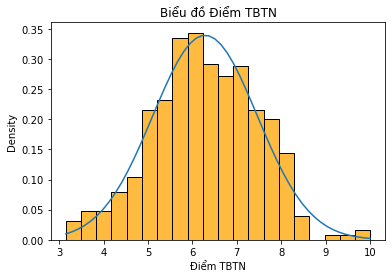

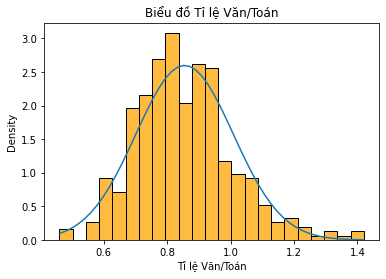

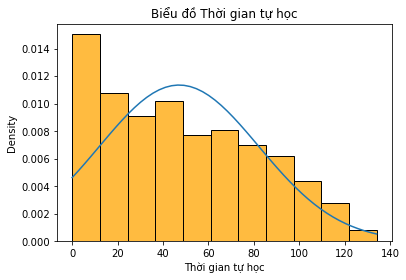

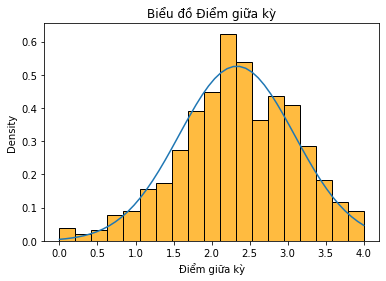

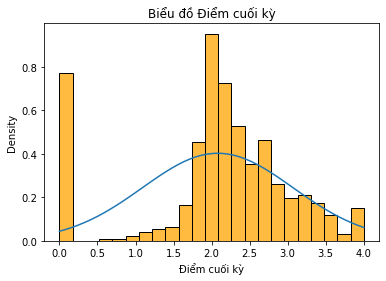

In [9]:
for column in columns_dinh_luong:
    hist(df[column], label = f'Biểu đồ {column}')

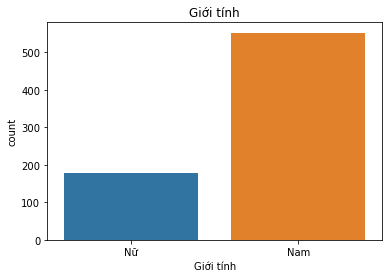

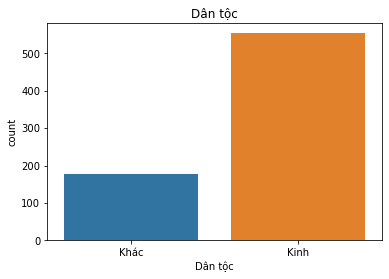

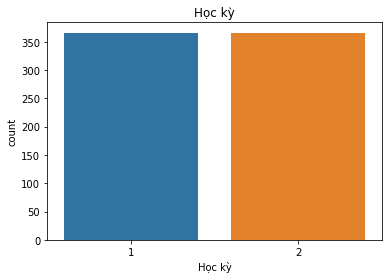

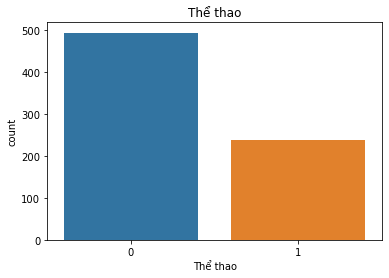

In [10]:
for dinh_tinh in columns_dinh_tinh:
    sns.countplot(data=df, x=dinh_tinh)
    plt.title(label=dinh_tinh)
    plt.show()

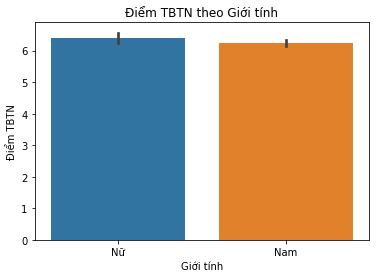

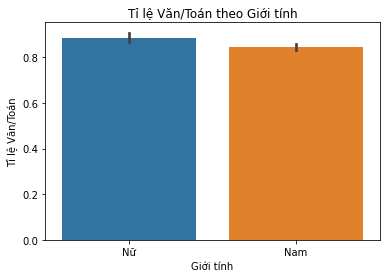

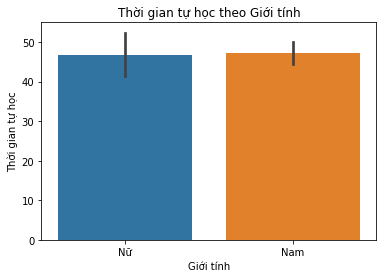

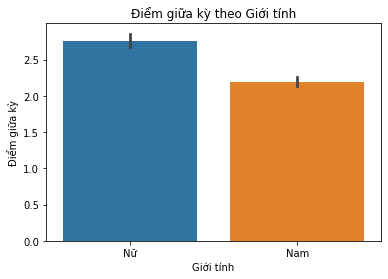

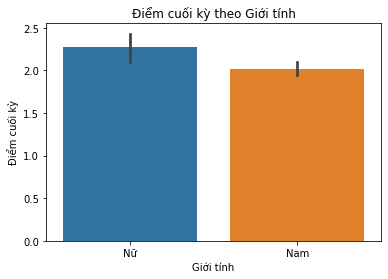

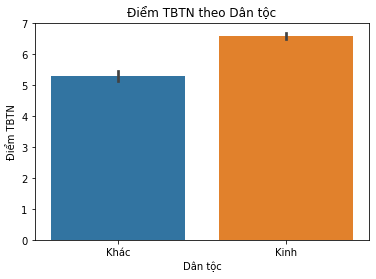

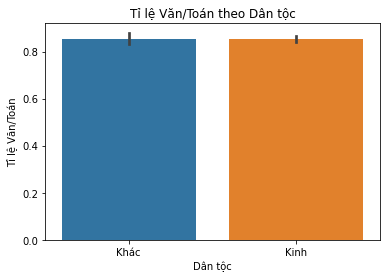

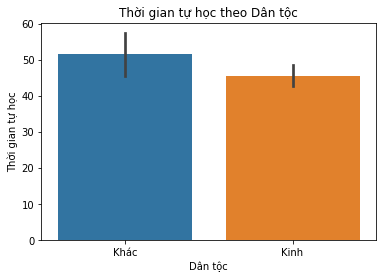

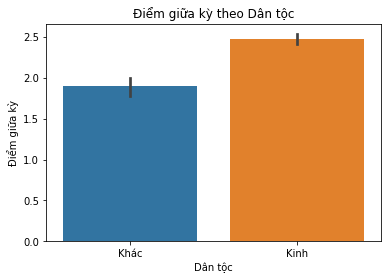

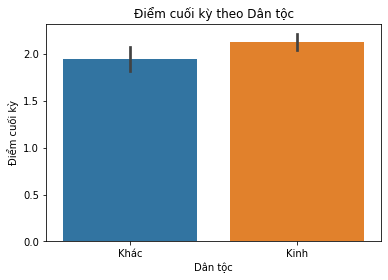

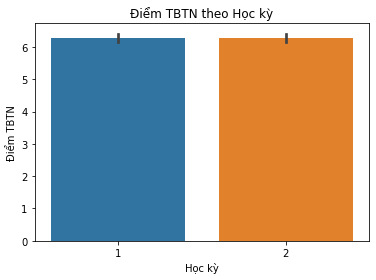

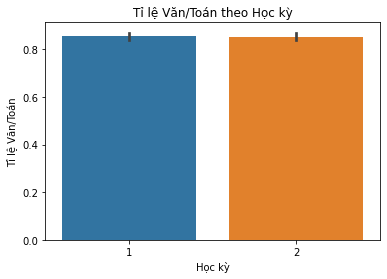

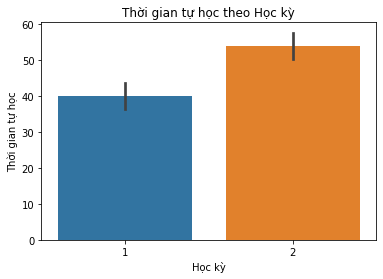

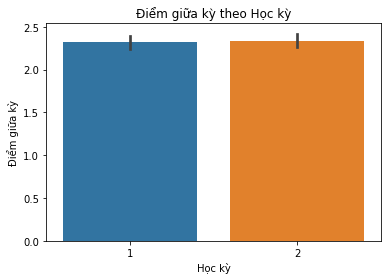

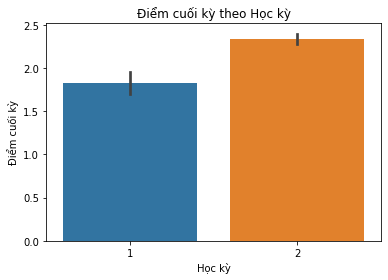

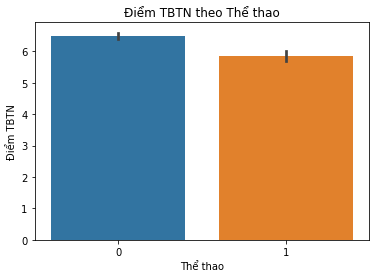

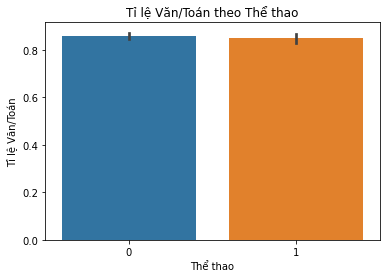

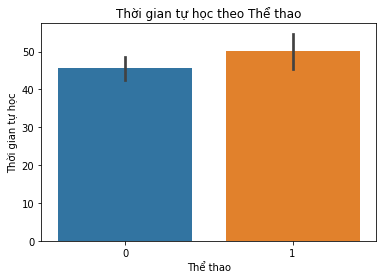

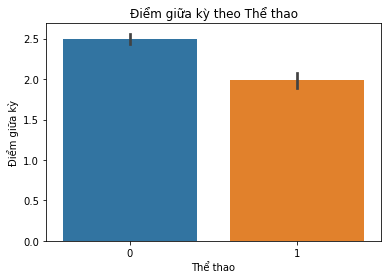

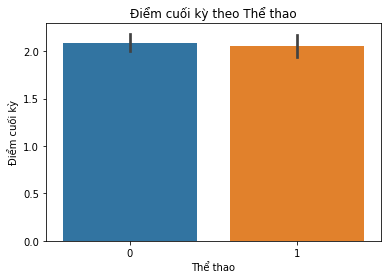

In [11]:
for dinh_tinh in columns_dinh_tinh:
    for dinh_luong in columns_dinh_luong:
        sns.barplot(data=df, x=dinh_tinh, y=dinh_luong, estimator = np.mean)
        plt.title(label = f'{dinh_luong} theo {dinh_tinh}')
        plt.show()

<AxesSubplot:xlabel='Dân tộc', ylabel='Điểm giữa kỳ'>

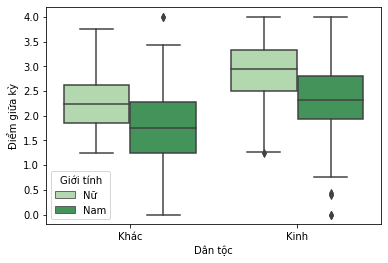

In [12]:
sns.boxplot(data=df, x='Dân tộc', y='Điểm giữa kỳ', hue = 'Giới tính', palette="Greens")

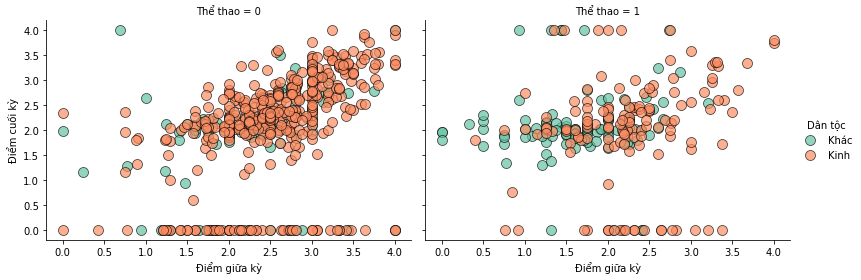

In [13]:
kws = dict(s=100, edgecolor='k', alpha=.7)
score = sns.FacetGrid(data=df, col='Thể thao',
                      hue='Dân tộc',
                      palette='Set2',
                      height=4, aspect=1.4)
score.map(sns.scatterplot, 'Điểm giữa kỳ', 'Điểm cuối kỳ', **kws)
score.add_legend()

# Kiểm định thống kê

In [9]:
np.random.seed(20)

In [13]:
df_30 = df.sample(30)

In [14]:
df_30.head()

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
685,686,7.55,0.93,640,267,Nam,Kinh,1,0,1.86,0,0.00
83,84,6.78,0.76,5,1,Nữ,Kinh,1,64,3.40,0,3.18
19,20,5.45,0.70,78,17,Nam,Kinh,1,59,2.50,1,2.38
459,460,6.15,0.96,370,165,Nam,Kinh,1,59,3.00,0,2.38
717,718,6.01,0.65,509,315,Nam,Kinh,1,0,0.92,1,0.00


In [16]:
def results(p, alpha=0.05):
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df

## Ngiên cứu sự khác nhau về Điểm thi cuối kỳ của những người có chơi thể thao và không chơi thể thao (qua một mẫu ngẫu nhiên gồm có 30 sinh viên)

### Giả thiết thống kê
- **H0**: *Không có sự khác nhau về giá trị trung bình Điểm cuối kỳ về việc chơi thể thao*
- **H1**: *Có sự khác nhau về giá trị trung bình Điểm cuối kỳ về việc chơi thể thao*

### Kiểm định T- test

In [17]:
p = {}
p['score'], p['p_value'] = stats.ttest_ind(df_30['Điểm cuối kỳ'][df_30['Thể thao']==0],
                                           df_30['Điểm cuối kỳ'][df_30['Thể thao']==1])
results(p)

,score,p_value,KetLuan
,1.893701,0.06864,Chấp nhận H0 với mức ý nghĩa 0.05


### Các giả định
* *Mẫu độc lập*
* *Phân phối chuẩn*

In [18]:
stats.shapiro(df_30['Điểm cuối kỳ'][df_30['Thể thao']==0])

ShapiroResult(statistic=0.8670681118965149, pvalue=0.01287824846804142)

In [19]:
stats.shapiro(df_30['Điểm cuối kỳ'][df_30['Thể thao']==1])

ShapiroResult(statistic=0.8315141201019287, pvalue=0.02443966455757618)

* *Đồng nhất phương sai*

In [27]:
stats.levene(df_30['Điểm cuối kỳ'][df_30['Thể thao']==0],
            df_30['Điểm cuối kỳ'][df_30['Thể thao']==1])

LeveneResult(statistic=0.03967145593145795, pvalue=0.8435636607866674)

## Ngiên cứu sự khác nhau về Điểm thi cuối kỳ của 2 giới (qua một mẫu ngẫu nhiên gồm có 30 sinh viên)

### Giả thiết thống kê
- **H0**: *Không có sự khác nhau về giá trị trung bình Điểm cuối kỳ về giới tính*
- **H1**: *Có sự khác nhau về giá trị trung bình Điểm cuối kỳ về giới tính*

### Kiểm định T- test

In [28]:
p = {}
p['score'], p['p_value'] = stats.ttest_ind(df_30['Điểm cuối kỳ'][df_30['Giới tính']=='Nam'],
                                           df_30['Điểm cuối kỳ'][df_30['Giới tính']=='Nữ'])
results(p)

,score,p_value,KetLuan
,-1.551034,0.132124,Chấp nhận H0 với mức ý nghĩa 0.05


### Các giả định
* *Mẫu độc lập*
* *Phân phối chuẩn*

In [29]:
stats.shapiro(df_30['Điểm cuối kỳ'][df_30['Giới tính']=='Nam'])

ShapiroResult(statistic=0.8371046781539917, pvalue=0.0012716376222670078)

In [30]:
stats.shapiro(df_30['Điểm cuối kỳ'][df_30['Giới tính']=='Nữ'])

ShapiroResult(statistic=0.9074521660804749, pvalue=0.4198479950428009)

* *Đồng nhất phương sai*

In [31]:
stats.levene(df_30['Điểm cuối kỳ'][df_30['Giới tính']=='Nam'],
            df_30['Điểm cuối kỳ'][df_30['Giới tính']=='Nữ'])

LeveneResult(statistic=0.5705083313548522, pvalue=0.45636413300625744)

## Ngiên cứu sự khác nhau của Điểm xếp loại cuối kỳ về giới tính

In [32]:
bins_tu_hoc = [-1,15,45,75,135]
bins_cuoi_ky = [-1, 1, 1.7, 2.7, 3.7, 4]

In [33]:
df['StudyHours'] = pd.cut(df['Thời gian tự học'], bins_tu_hoc, labels=['Thấp','Trung bình','Nhiều','Rất nhiều'])

In [34]:
df['LetterGrade'] = pd.cut(df['Điểm cuối kỳ'], bins_cuoi_ky, labels = ['F','D','C','B','A'])

In [35]:
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,StudyHours,LetterGrade
593,594,3.43,0.75,144,55,Nữ,Khác,1,112,1.60,0,2.00,Rất nhiều,C
36,37,5.03,0.85,283,76,Nam,Khác,2,51,1.60,1,1.64,Nhiều,D
337,338,4.48,1.06,219,63,Nam,Khác,1,40,2.00,1,1.65,Trung bình,D
2,3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,0,2.09,Trung bình,C
299,300,7.48,0.81,485,74,Nữ,Kinh,1,31,3.00,0,1.83,Trung bình,C
120,121,5.87,0.79,48,32,Nữ,Kinh,2,16,2.31,0,2.12,Trung bình,C
106,107,6.57,0.71,251,45,Nam,Kinh,2,50,2.13,0,2.54,Nhiều,C
589,590,7.34,0.78,687,314,Nam,Kinh,1,27,2.50,0,1.96,Trung bình,C
49,50,5.73,1.10,571,344,Nam,Khác,1,31,2.33,0,2.22,Trung bình,C
193,194,3.78,0.93,240,151,Nam,Khác,1,100,2.00,1,2.20,Rất nhiều,C


### Giả thiết thống kê
- **H0**: *Giới tính không ảnh hưởng đến Điểm xếp loại cuối kỳ*
- **H1**: *Giới tính ảnh hưởng đến Điểm xếp loại cuối kỳ*

### Kiểm định Chi2

In [36]:
tan_so_xep_loai = pd.crosstab(index=df['Giới tính'], columns=df['LetterGrade'])
tan_so_xep_loai

LetterGrade,F,D,C,B,A
Giới tính,,,,,
Nam,74,30,353,77,18
Nữ,29,3,71,71,5


In [37]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_xep_loai)

In [38]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,62.965975,6.898717e-13,4,Chấp nhận H1 với mức ý nghĩa 0.05


*Về mặt thống kê giới tính có ảnh hưởng đến Điểm xếp loại cuối kì với mức ý nghĩa 0.05.*

### Kỹ thuật EDA

In [39]:
nam = df['Điểm cuối kỳ'][df['Giới tính']=='Nam']
nu = df['Điểm cuối kỳ'][df['Giới tính']=='Nữ']

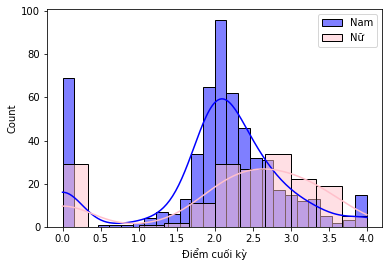

In [41]:
sns.histplot(data=nam, color = 'blue',label='Nam', kde=True)
sns.histplot(data=nu, color = 'pink', label='Nữ', kde=True)
plt.legend()
plt.show()

## Kiểm chứng nhận định cho rằng thời gian tự học (StudyHours) có ảnh hưởng đến kết quả LetterGrade (có thể dùng Chi2 test) với mức ý nghĩa 5%.

### Giả thiết thống kê
- **H0**: *Thời gian tự học không ảnh hưởng đến Điểm xếp loại cuối kỳ*
- **H1**: *Thời gian tự học ảnh hưởng đến Điểm xếp loại cuối kỳ*

In [52]:
tan_so_xep_letter = pd.crosstab(index=df['StudyHours'], columns=df['LetterGrade'])
tan_so_xep_letter

LetterGrade,F,D,C,B,A
StudyHours,,,,,
Thấp,101,17,39,16,15
Trung bình,2,9,134,54,4
Nhiều,0,4,127,32,2
Rất nhiều,0,3,124,46,2


### Kiểm định Chi square

In [53]:
score, p_value, dof, expected = stats.chi2_contingency(tan_so_xep_letter)

In [54]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,396.956073,1.669123e-77,12,Chấp nhận H1 với mức ý nghĩa 0.05


*Về mặt thống kê thời gian tự học có ảnh hưởng đến Điểm xếp loại cuối kì với mức ý nghĩa 0.05.*

### Kỹ Thuật EDA

In [55]:
thap = df['Điểm cuối kỳ'][df['StudyHours']=='Thấp']
trung =  df['Điểm cuối kỳ'][df['StudyHours']=='Trung bình']
nhieu = df['Điểm cuối kỳ'][df['StudyHours']=='Nhiều']
rat_nhieu = df['Điểm cuối kỳ'][df['StudyHours']=='Rất nhiều']

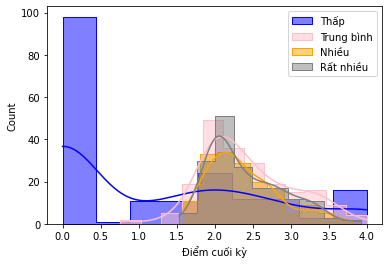

In [56]:
sns.histplot(data=thap, color='blue',label='Thấp',element="step", kde=True)
sns.histplot(data=trung, color='pink', label='Trung bình',element="step", kde=True)
sns.histplot(data=nhieu, color='orange',label='Nhiều',element="step", kde=True)
sns.histplot(data=rat_nhieu, color='gray', label='Rất nhiều',element="step", kde=True)
plt.legend()
plt.show()

## Kiểm chứng nhận định cho rằng điểm kiểm tra giữa kỳ có ảnh hưởng đến điểm thi cuối kỳ với độ tin cậy 95%.

In [57]:
bins_giua_ky = [-1, 1, 1.7, 2.7, 3.7, 4]
df['MidLetterGrade'] = pd.cut(df['Điểm giữa kỳ'], bins_giua_ky, labels = ['F','D','C','B','A'])

In [58]:
df.head()

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,StudyHours,LetterGrade,MidLetterGrade
0,1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,0,2.04,Trung bình,C,C
1,2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,0,2.03,Trung bình,C,C
2,3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,0,2.09,Trung bình,C,D
3,4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,0,0.00,Thấp,F,D
4,5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,0,1.78,Thấp,C,D


### Giả thiết thống kê
- **H0**: *Kết quả thi giữa kỳ không ảnh hưởng đến Kết quả thi cuối kỳ*
- **H1**: *Kết quả thi giữa kỳ ảnh hưởng đến kết quả thi cuối kỳ*

### Kỹ thuật EDA

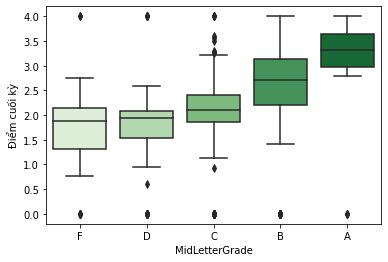

In [59]:
sns.boxplot(x='MidLetterGrade',y='Điểm cuối kỳ',data = df, palette="Greens")
plt.show()

### Kiểm định Anova

In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [61]:
giua_cuoi_ky_df = df[['MidLetterGrade', 'Điểm cuối kỳ']]

In [62]:
giua_cuoi_ky_df.columns = ['MidLetterGrade', 'DiemCuoiKy']

In [63]:
giua_cuoi_ky_df.head()

,MidLetterGrade,DiemCuoiKy
0,C,2.04
1,C,2.03
2,D,2.09
3,D,0.00
4,D,1.78


In [64]:
model = ols('DiemCuoiKy ~ C(MidLetterGrade)', data=giua_cuoi_ky_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [65]:
anova_table

,sum_sq,df,F,PR(>F)
C(MidLetterGrade),70.135279,4.0,19.713289,2.031896e-15
Residual,645.734632,726.0,NaN,NaN


In [66]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,19.713289,2.031896e-15,Chấp nhận H1 với mức ý nghĩa 0.05


### Kiểm tra hậu nghiệm

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [68]:
tukey = pairwise_tukeyhsd(endog=giua_cuoi_ky_df['DiemCuoiKy'],
                         groups=giua_cuoi_ky_df['MidLetterGrade'],
                         alpha=0.05)

In [69]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.4424,0.2858,-1.059,0.1742,False
A,C,-0.9681,0.001,-1.5753,-0.3609,True
A,D,-1.1882,0.001,-1.837,-0.5395,True
A,F,-1.1837,0.001,-1.9023,-0.4651,True
B,C,-0.5256,0.001,-0.7464,-0.3049,True
B,D,-0.7458,0.001,-1.0634,-0.4282,True
B,F,-0.7413,0.001,-1.1845,-0.2982,True
C,D,-0.2202,0.2603,-0.5192,0.0788,False
C,F,-0.2157,0.6272,-0.6457,0.2144,False
D,F,0.0045,0.9,-0.4824,0.4914,False


### Các giả định

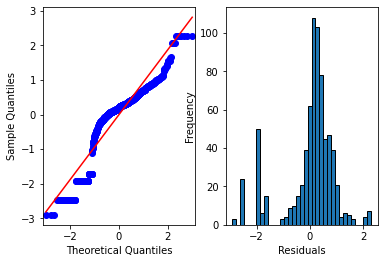

In [70]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [71]:
p_v = stats.shapiro(model.resid)[1]
p_v

9.45258101707414e-25

*Mẫu không tuân theo phân phối chuẩn*

## So sánh điểm trung bình kết thúc học kỳ của các nhóm Giới tính-Dân tộc

In [52]:
gt_dt_diem_cuoi_ky_df = giua_cuoi_ky_df[['DiemCuoiKy']]

In [53]:
gt_dt_diem_cuoi_ky_df['GioiTinhDanToc'] = df['Giới tính'] +'- '+df['Dân tộc']

In [54]:
gt_dt_diem_cuoi_ky_df.head()

,DiemCuoiKy,GioiTinhDanToc
0,2.04,Nữ- Khác
1,2.03,Nam- Kinh
2,2.09,Nam- Kinh
3,0.00,Nam- Kinh
4,1.78,Nam- Kinh


### Giả thiết thống kê
- **H0**: *Không có sự khác biệt của điểm trung bình kết thúc học kỳ giữa các nhóm Giới tính- Dân tộc*
- **H1**: *Có sự khác biệt của điểm trung bình kết thúc học kỳ giữa các nhóm Giới tính- Dân tộc*

### Kỹ thuật EDA

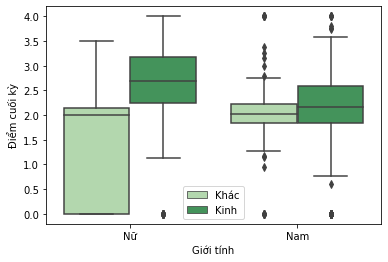

In [55]:
sns.boxplot(data=df, x='Giới tính', y='Điểm cuối kỳ', hue = 'Dân tộc', palette="Greens")
plt.legend()
plt.show()

### Kiểm định ANOVA

In [56]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [57]:
model = ols('DiemCuoiKy ~ C(GioiTinhDanToc)', data=gt_dt_diem_cuoi_ky_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [58]:
anova_table

,sum_sq,df,F,PR(>F)
C(GioiTinhDanToc),28.468563,3.0,10.036177,0.000002
Residual,687.401347,727.0,NaN,NaN


In [59]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,10.036177,0.000002,Chấp nhận H1 với mức ý nghĩa 0.05


### Kiểm tra hậu nghiệm

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [61]:
tukey = pairwise_tukeyhsd(endog=gt_dt_diem_cuoi_ky_df['DiemCuoiKy'],
                         groups=gt_dt_diem_cuoi_ky_df['GioiTinhDanToc'],
                         alpha=0.05)

In [62]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Nam- Khác,Nam- Kinh,-0.0205,0.9,-0.2654,0.2245,False
Nam- Khác,Nữ- Khác,-0.4217,0.0887,-0.8845,0.0412,False
Nam- Khác,Nữ- Kinh,0.4046,0.0028,0.1064,0.7028,True
Nam- Kinh,Nữ- Khác,-0.4012,0.0773,-0.8309,0.0285,False
Nam- Kinh,Nữ- Kinh,0.4251,0.001,0.1814,0.6687,True
Nữ- Khác,Nữ- Kinh,0.8263,0.001,0.3641,1.2884,True


### Các giả định

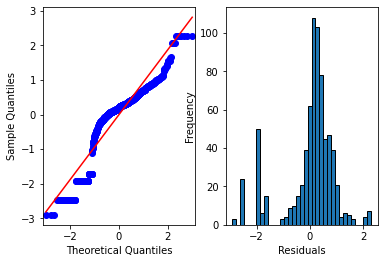

In [72]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [73]:
p_v = stats.shapiro(model.resid)[1]
p_v

9.45258101707414e-25

*Mẫu không tuân theo phân phối chuẩn*

## So sánh tỉ lệ Văn/toán của các nhóm Giới tính- Học kỳ

In [74]:
df_vt_gt_hk = df[['Tỉ lệ Văn/Toán']]

In [75]:
df_vt_gt_hk['GioiTinhHocKy'] = df['Giới tính']+'-' + df['Học kỳ'].apply(str) 

<ipython-input-75-e3a40258b2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vt_gt_hk['GioiTinhHocKy'] = df['Giới tính']+'-' + df['Học kỳ'].apply(str)


In [84]:
df_vt_gt_hk.head()

,Tỉ lệ Văn/Toán,GioiTinhHocKy
0,0.48,Nữ-2
1,0.81,Nam-1
2,0.81,Nam-2
3,0.88,Nam-1
4,0.88,Nam-2


In [87]:
df_vt_gt_hk.columns = ['TiLeVanToan', 'GioiTinhHocKy']

In [112]:
df_vt_gt_hk.head()

,TiLeVanToan,GioiTinhHocKy
0,0.48,Nữ-2
1,0.81,Nam-1
2,0.81,Nam-2
3,0.88,Nam-1
4,0.88,Nam-2


### Giả thiết thống kê
- **H0**: *Trung bình Văn/Toán không có sự khác nhau về Giới tính - Học kỳ*
- **H1**: *Trung bình Văn/Toán có sự khác nhau về Giới tính - Học kỳ*

### Kỹ Thuật EDA

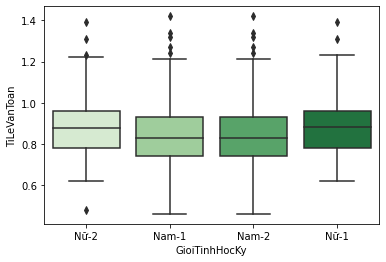

In [108]:
sns.boxplot(x='GioiTinhHocKy',y='TiLeVanToan',data = df_vt_gt_hk, palette="Greens")
plt.show()

### Kiểm định ANOVA

In [109]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [110]:
model = ols('TiLeVanToan ~ C(GioiTinhHocKy)', data=df_vt_gt_hk).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [111]:
anova_table

,sum_sq,df,F,PR(>F)
C(GioiTinhHocKy),0.219092,3.0,3.121938,0.025413
Residual,17.006554,727.0,NaN,NaN


In [103]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,3.121938,0.025413,Chấp nhận H1 với mức ý nghĩa 0.05


### Kiểm tra hậu nghiệm

In [97]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [99]:
tukey = pairwise_tukeyhsd(endog=df_vt_gt_hk['TiLeVanToan'],
                         groups=df_vt_gt_hk['GioiTinhHocKy'],
                         alpha=0.05)

In [102]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Nam-1,Nam-2,0.0,0.9,-0.0335,0.0335,False
Nam-1,Nữ-1,0.0425,0.1044,-0.0056,0.0905,False
Nam-1,Nữ-2,0.0379,0.1735,-0.0099,0.0857,False
Nam-2,Nữ-1,0.0425,0.1044,-0.0056,0.0905,False
Nam-2,Nữ-2,0.0379,0.1735,-0.0099,0.0857,False
Nữ-1,Nữ-2,-0.0045,0.9,-0.0634,0.0543,False


### Các giả định

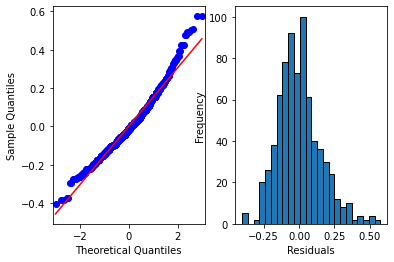

In [114]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [115]:
p_v = stats.shapiro(model.resid)[1]
p_v

2.2109583053264714e-09

*Mẫu không tuân theo phân phối chuẩn*